***Customer Segmentation using R (K-Means) on Online Retail***

This project leverages the power of R programming and the K-Means clustering algorithm to analyze online retail transaction data, uncovering distinct customer segments based on their purchasing behavior. By applying data preprocessing, feature engineering (including RFM analysis), and unsupervised machine learning techniques, this initiative aims to provide actionable insights into customer groups, enabling targeted marketing strategies and enhanced customer relationship management. The findings from this segmentation can inform business decisions related to product recommendations, promotional offers, and overall customer engagement.

Contribution - Individual


Github link-https://github.com/Vaishnavi24-commits/Customer-Segmentation-using-R-K-Means-on-Online-Retail

 Install and load necessary libraries

In [10]:
library(readxl)
library(dplyr)
library(tidyr)
library(purrr)

Load the Online Retail dataset

In [2]:
online_retail <- read_excel("/content/Online Retail.xlsx")

Data Exploration

In [3]:
head(online_retail)
str(online_retail)
summary(online_retail)
# Check for missing values
sum(is.na(online_retail))

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


tibble [541,909 × 8] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:541909] "536365" "536365" "536365" "536365" ...
 $ StockCode  : chr [1:541909] "85123A" "71053" "84406B" "84029G" ...
 $ Description: chr [1:541909] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:541909] 6 6 8 6 6 2 6 6 6 32 ...
 $ InvoiceDate: POSIXct[1:541909], format: "2010-12-01 08:26:00" "2010-12-01 08:26:00" ...
 $ UnitPrice  : num [1:541909] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID : num [1:541909] 17850 17850 17850 17850 17850 ...
 $ Country    : chr [1:541909] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


  InvoiceNo          StockCode         Description           Quantity         
 Length:541909      Length:541909      Length:541909      Min.   :-80995.000  
 Class :character   Class :character   Class :character   1st Qu.:     1.000  
 Mode  :character   Mode  :character   Mode  :character   Median :     3.000  
                                                          Mean   :     9.552  
                                                          3rd Qu.:    10.000  
                                                          Max.   : 80995.000  
                                                                              
  InvoiceDate                    UnitPrice            CustomerID    
 Min.   :2010-12-01 08:26:00   Min.   :-11062.060   Min.   :12346   
 1st Qu.:2011-03-28 11:34:00   1st Qu.:     1.250   1st Qu.:13953   
 Median :2011-07-19 17:17:00   Median :     2.080   Median :15152   
 Mean   :2011-07-04 13:34:57   Mean   :     4.611   Mean   :15288   
 3rd Qu.:2011-10-19 11:

[1] 136534

Data Preparation and Feature Engineering

In [4]:
# Clean up data (remove rows with missing CustomerID, negative Quantity, etc.)
online_retail_cleaned <- online_retail %>%
  filter(!is.na(CustomerID), Quantity > 0, UnitPrice > 0)

# Calculate Monetary Value for each transaction
online_retail_cleaned <- online_retail_cleaned %>%
  mutate(TotalPrice = Quantity * UnitPrice)

# Aggregate data to customer level to create RFM features
customer_data <- online_retail_cleaned %>%
  group_by(CustomerID) %>%
  summarise(
    Recency = as.numeric(Sys.Date() - max(InvoiceDate)),
    Frequency = n_distinct(InvoiceNo),
    MonetaryValue = sum(TotalPrice)
  )

Warning message:
“There were 4338 warnings in `summarise()`.
The first warning was:
ℹ In argument: `Recency = as.numeric(Sys.Date() - max(InvoiceDate))`.
ℹ In group 1: `CustomerID = 12346`.
Caused by warning:
! Incompatible methods ("-.Date", "-.POSIXt") for "-"
ℹ Run `dplyr::last_dplyr_warnings()` to see the 4337 remaining warnings.”


In [8]:
# --- Handle Missing Values (If any after cleaning) ---
customer_data <- na.omit(customer_data)
# --- Scale the Data ---
customer_data_scaled <- customer_data %>%
  select(Recency, Frequency, MonetaryValue) %>%
  scale()

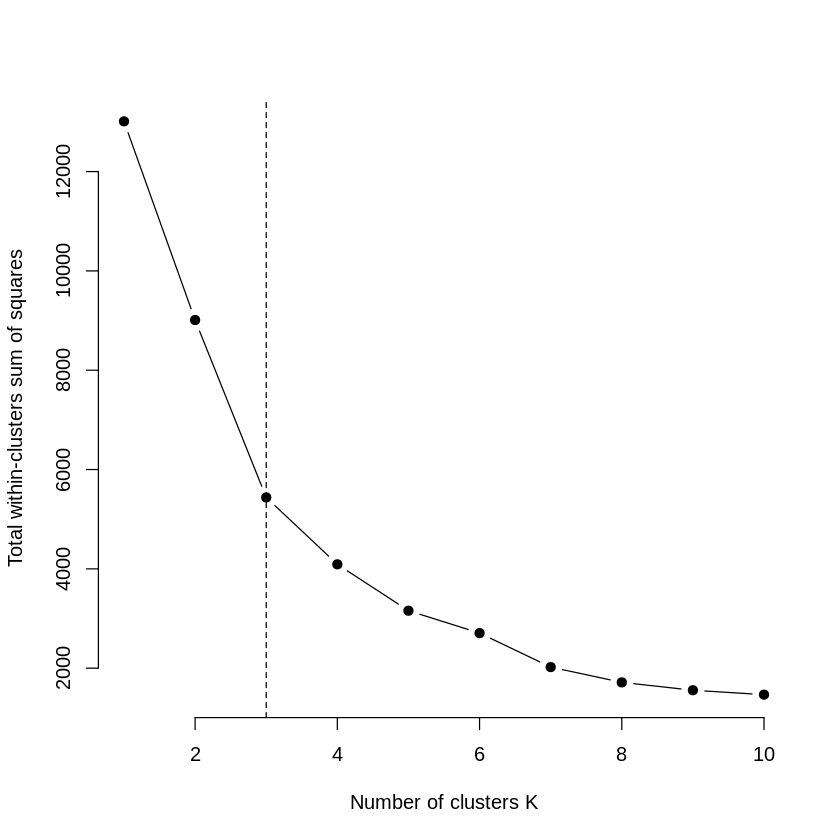

In [11]:
# --- Determine the Optimal Number of Clusters (Elbow Method) ---
set.seed(123) # For reproducibility
wss <- 1:10 %>%
  map(function(k){
    kmeans(customer_data_scaled, k, nstart=10)$tot.withinss
  })

plot(1:10, wss, type="b", pch=19, frame=FALSE,
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")
abline(v = 3, lty =2) # Example: visually identify a potential elbow

K-Means Clustering

In [12]:
k <- 3 # Based on the elbow method (you might choose a different value)
kmeans_model <- kmeans(customer_data_scaled, centers = k, nstart = 25)

# Assign cluster labels to customer data
customer_segments <- customer_data %>%
  mutate(Cluster = kmeans_model$cluster)

# --- Analyze the Clusters ---
customer_segments %>%
  group_by(Cluster) %>%
  summarise(
    AvgRecency = mean(Recency),
    AvgFrequency = mean(Frequency),
    AvgMonetaryValue = mean(MonetaryValue),
    Count = n()
  )

# You can further analyze the characteristics of each cluster
# (e.g., visualize the distributions of RFM features per cluster).

Cluster,AvgRecency,AvgFrequency,AvgMonetaryValue,Count
<int>,<dbl>,<dbl>,<dbl>,<int>
1,-1319888020,4.677829,1857.7458,3225
2,-1322942981,66.423077,85904.3515,26
3,-1302150454,1.581417,631.7062,1087


Visualizing Clusters


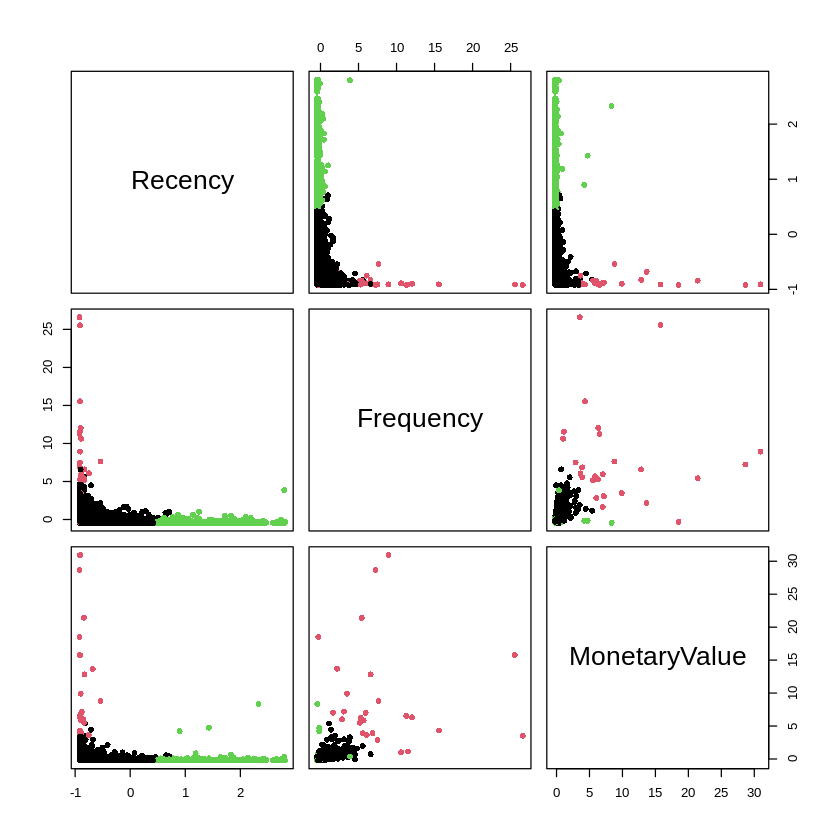

In [13]:
if (nrow(customer_data_scaled) > 0) {
  plot_data <- as.data.frame(customer_data_scaled) %>%
    mutate(Cluster = as.factor(kmeans_model$cluster))
  if (nrow(plot_data) > 0) {
    pairs(plot_data[, 1:3], col = plot_data$Cluster, pch = 16)
  } else {
    print("Warning: No data available for visualization.")
  }
} else {
  print("Warning: Scaled data is empty, cannot visualize.")
}
